In [1]:
!git pull

Already up-to-date.


In [2]:
%matplotlib inline
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(font_scale=1.5)

In [3]:
states = pd.read_excel('nst-est2019-01.xlsx', skiprows=3)
states.columns = ['Name' if i==0 else x for i, x in enumerate(states)]
states = states.rename(columns={2019: 'Population'})
states_pop = states.set_index('Name')[['Population']]
states_pop.index = states_pop.index.str.replace('.', '')
states_pop.head(10)

,Population
Name,
United States,328239523.0
Northeast,55982803.0
Midwest,68329004.0
South,125580448.0
West,78347268.0
Alabama,4903185.0
Alaska,731545.0
Arizona,7278717.0
Arkansas,3017804.0


In [4]:
country_pop = pd.read_csv('population-figures-by-country-csv_csv.csv').set_index('Country').iloc[:, -1:]
country_pop.columns = ['Population']
country_pop.head()

,Population
Country,
Aruba,104822.0
Afghanistan,34656032.0
Angola,28813463.0
Albania,2876101.0
Andorra,77281.0


In [5]:
confirmed = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
dates = [col for col in confirmed if '20' in col]

In [6]:
confirmed_state = confirmed[confirmed['Country/Region']=='US'].set_index('Province/State').join(states_pop, how='inner')
confirmed_state = confirmed_state[dates].div(confirmed_state['Population'], axis=0)
confirmed_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
Washington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000048,0.000058,0.000075,0.000075,0.000084,0.000119,0.000141,0.000133,0.000181,0.000200
New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000011,0.000017,0.000022,0.000027,0.000038,0.000050,0.000088,0.000128,0.000276,0.000427
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,0.000006,0.000007,0.000009,0.000011,0.000014,0.000018,0.000019,0.000024,0.000030
Massachusetts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000014,0.000016,0.000018,0.000020,0.000024,0.000029,0.000032,0.000032,0.000048,0.000060
Georgia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000003,0.000004,0.000006,0.000009,0.000011,0.000014,0.000019,0.000027,0.000040


In [7]:
confirmed_country = confirmed[confirmed['Province/State'].isnull() | (confirmed['Province/State']==confirmed['Country/Region'])].set_index('Country/Region').join(country_pop, how='inner')
confirmed_country = confirmed_country[dates].div(confirmed_country['Population'], axis=0)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
Thailand,2.904296e-08,4.356443e-08,7.260739e-08,1.016503e-07,1.161718e-07,1.161718e-07,2.033007e-07,2.033007e-07,2.033007e-07,2.759081e-07,...,8.567672e-07,1.016503e-06,1.089111e-06,1.190761e-06,1.655448e-06,2.134657e-06,2.570302e-06,3.078553e-06,3.949842e-06,4.675916e-06
Japan,1.574871e-08,7.874356e-09,1.574871e-08,1.574871e-08,3.149742e-08,3.149742e-08,5.512049e-08,5.512049e-08,8.661792e-08,1.181153e-07,...,5.031714e-06,5.031714e-06,5.519924e-06,6.086877e-06,6.606585e-06,6.496344e-06,6.913685e-06,7.000303e-06,7.275905e-06,7.583005e-06
Singapore,0.000000e+00,1.783395e-07,5.350185e-07,5.350185e-07,7.133580e-07,8.916975e-07,1.248376e-06,1.248376e-06,1.783395e-06,2.318413e-06,...,3.174443e-05,3.174443e-05,3.566790e-05,3.780797e-05,4.030473e-05,4.333650e-05,4.743830e-05,5.582026e-05,6.152712e-05,6.866070e-05
Nepal,0.000000e+00,0.000000e+00,0.000000e+00,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,...,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08,3.450326e-08
Malaysia,0.000000e+00,0.000000e+00,0.000000e+00,9.619311e-08,1.282575e-07,1.282575e-07,1.282575e-07,2.244506e-07,2.565150e-07,2.565150e-07,...,4.777591e-06,4.777591e-06,6.316681e-06,7.631320e-06,1.372355e-05,1.814843e-05,2.157932e-05,2.533085e-05,2.885793e-05,3.302630e-05


In [8]:
df = pd.concat([confirmed_state, confirmed_country])
df = np.log10(df)
df.columns = [datetime.strptime(x, '%m/%d/%y') for x in df.columns]
last = df.columns[-1]
print(last)
n_past = df.shape[1]
for i in range(1, 101):
    df[last + timedelta(0, i*3600*24, 0)] = df[last]+(0.06*i)

2020-03-20 00:00:00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


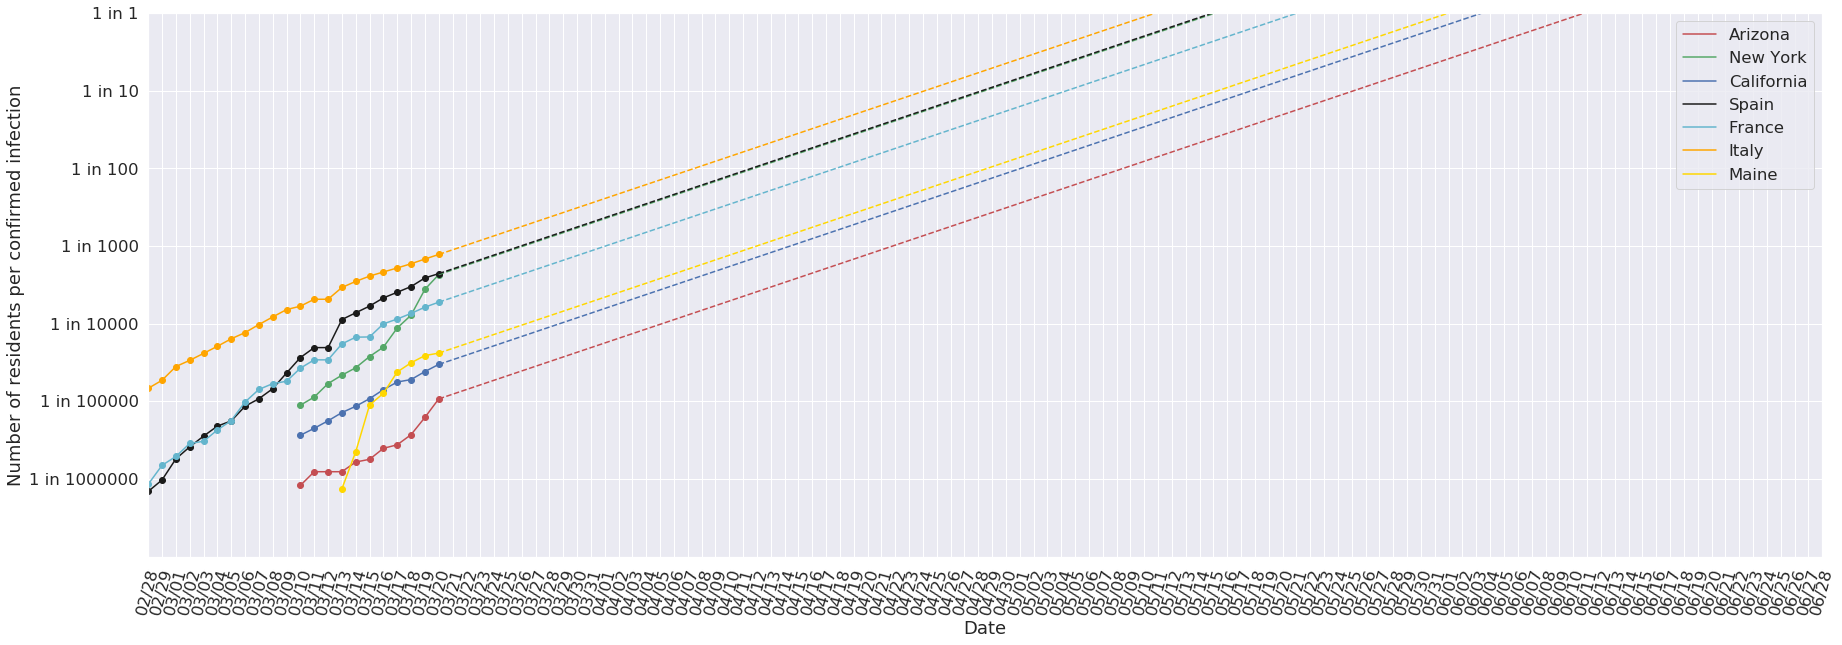

In [9]:
days_back = 21
first = datetime.strptime('2/28/20', '%m/%d/%y')
places = ['Arizona', 'New York', 'California', 'Spain', 'France', 'Italy', 'Maine']
colors = ['r', 'g', 'b', 'k', 'c', 'orange', 'gold', 'blue']
ax = df.loc[places, :].loc[:, first:last].T.plot(figsize=(30, 10), linestyle='-', marker='o', color=colors[:len(places)])
df.loc[places, :].loc[:, last:].T.plot(ax=ax, linestyle='--', legend=False, color=colors[:len(places)])
tick_locs = df.columns[df.columns >= first]
plt.xticks(tick_locs, [datetime.strftime(x, '%m/%d') for x in tick_locs], rotation=75);
log_units = np.linspace(-6, 0, 7)
plt.yticks(log_units, ['1 in %.0f' % (10.0**-x) for x in log_units]);
plt.xlabel('Date')
plt.ylabel('Number of residents per confirmed infection');
plt.ylim(-7, 0);